This notebook just takes the original FACET dataset and save the crop of each image on Google Drive.

In [138]:
import pandas as pd
from PIL import Image
import ast
from tqdm import tqdm

In [145]:
annotations = pd.read_csv('/content/drive/MyDrive/FACET/annotations.csv')
annotations.head()

,Unnamed: 0,person_id,filename,class1,class2,bounding_box,gender_presentation_masc,gender_presentation_fem,gender_presentation_non_binary,gender_presentation_na,...,has_headscarf,has_eyeware,visible_torso,visible_face,visible_minimal,lighting_underexposed,lighting_dimly_lit,lighting_well_lit,lighting_na,lighting_overexposed
0,0,350155620665729,sa_3532701.jpg,gymnast,NaN,"{""x"": 120.66, ""y"": 629.34, ""width"": 934.54, ""h...",0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,1,350731350602947,sa_10930017.jpg,boatman,NaN,"{""x"": 1667.85, ""y"": 826.53, ""width"": 29.81, ""h...",1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,350914907251402,sa_8295653.jpg,lifeguard,NaN,"{""x"": 1352.6, ""y"": 981.99, ""width"": 25.45, ""he...",1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3,351314803874856,sa_7347673.jpg,backpacker,NaN,"{""x"": 1674.89, ""y"": 668.6, ""width"": 404.47, ""h...",0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
4,4,351640253843285,sa_9002416.jpg,lawman,NaN,"{""x"": 1274.01, ""y"": 312.17, ""width"": 1101.8, ""...",1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


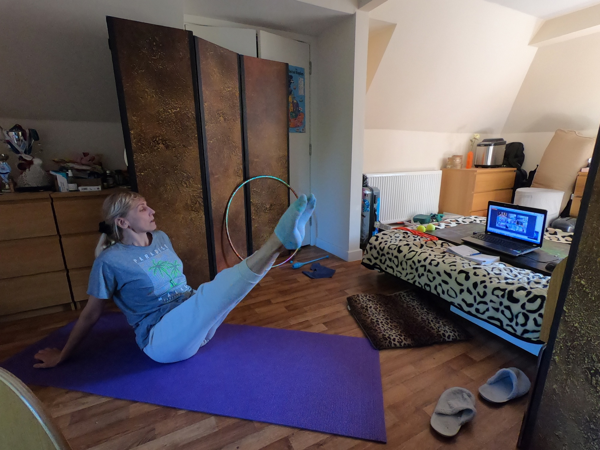

In [151]:
img_prop = 0.3
img_idx = 0

sample_img = Image.open(f'/content/drive/MyDrive/FACET/images/{annotations.filename[img_idx]}')
width, height = sample_img.size
sample_img.resize((int(img_prop*width), int(img_prop*height)))

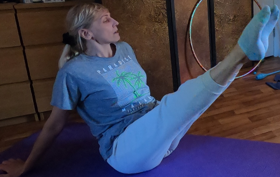

In [153]:
bb = ast.literal_eval(annotations.bounding_box[img_idx])
x_upper_left, y_upper_left, width, height, _  = bb.values()
crop_img = sample_img.crop((x_upper_left, y_upper_left, x_upper_left+width, y_upper_left+height))
width, height = crop_img.size
crop_img.resize((int(img_prop*width), int(img_prop*height)))

In [141]:
for idx, ann in tqdm(annotations.iterrows()):
  img = Image.open(f'/content/drive/MyDrive/FACET/images/{ann.filename}')
  bb = ast.literal_eval(ann.bounding_box)
  x_upper_left, y_upper_left, width, height, _  = bb.values()
  crop_img = img.crop((x_upper_left, y_upper_left, x_upper_left+width, y_upper_left+height))
  crop_img.save(f'/content/drive/MyDrive/FACET/cropped_images/{ann.person_id}.jpg')

Processing 0: 49551it [30:21, 27.20it/s]
